# TP2 K Nearest Neigbors (KNN)


### Table of Contents

* [0. Warm-up](#chapter0)
* [1. K-NN classification for  `Iris`](#chapter1)
    * [1.1 Data Preparation](#section_1_1)
    * [1.2 Writing a  K-NN classifier](#section_1_2)
    * [1.3 `sklearn`'s K-NN classifier](#section_1_3)
* [2. ($\star$) Decision boundary for a  K-NN classifier](#chapter2)
    

## 0. Warm-up <a class="anchor" id="chapter0"></a>

The table below  is a  dataset containing six observations, three covariates (features), and one dependent variable (label/target).


| Observations | $X^1$ | $X^2$ |$X^3$ |$Y$ |
| :-- | :-- | :-- | :-- | :-- |
| 0 | 0 | 3 | 0 | Red |
| 1 | 2 | 0 | 0| Red |
| 2 | 0 | 1 | 3 | Red |
| 3 | 0 | 1 | 2 | Green |
| 4 | -1 | 0 | 1 | Green |
| 5 | 1 | 1 | 1 | Red |

We want to use this dataset to predict the color for a new data point $x = (x1, x2, x3) = (0, 0, 0)$ using a K-NN classifier. 

**Exercise 1** : answer the following questions. (You can do the calculation yourself or write a Python program.)

(1) Calculate the euclidian  distance between each observation and  the point to be predicted $x = (x1, x2, x3) = (0, 0, 0)$.

(2) What is the prediction when $K=1$ ?

(2) What is the prediction when $K=3$ ?

**Answer for  Exercise 1**






In [1]:
import numpy as np

In [2]:
X0 = np.array([0, 0, 0])
X1 = np.array([0, 3, 0])
X2 = np.array([2, 0, 0])
X3 = np.array([0, 1, 3])
X4 = np.array([0, 1, 2])
X5 = np.array([-1, 0, 1])
X6 = np.array([1, 1, 1])
X = np.array([X1, X2, X3, X4, X5, X6])

distances = []
for x in X:
    dist = np.linalg.norm(x - X0) ** 2
    distances.append(dist)
    print(dist)

for k in [1, 3]:
    near = np.argsort(distances)[:k]
    print(f"The nearest neighbor is the observation {near}")
    print(f"The predicted value is {near}")

9.0
4.0
10.000000000000002
5.000000000000001
2.0000000000000004
2.9999999999999996
The nearest neighbor is the observation [4]
The predicted value is [4]
The nearest neighbor is the observation [4 5 1]
The predicted value is [4 5 1]


## 1. K-NN classification for  `Iris`  <a class="anchor" id="chapter1"></a>

In this practical work, we will use a classic dataset called 'Iris' included in 'sklearn'.

This dataset consists of 3 different types of irises (Setosa, Versicolor, and Virginica). The features are *sepal length*, *sepal width*, *petal length*, and *petal width*.

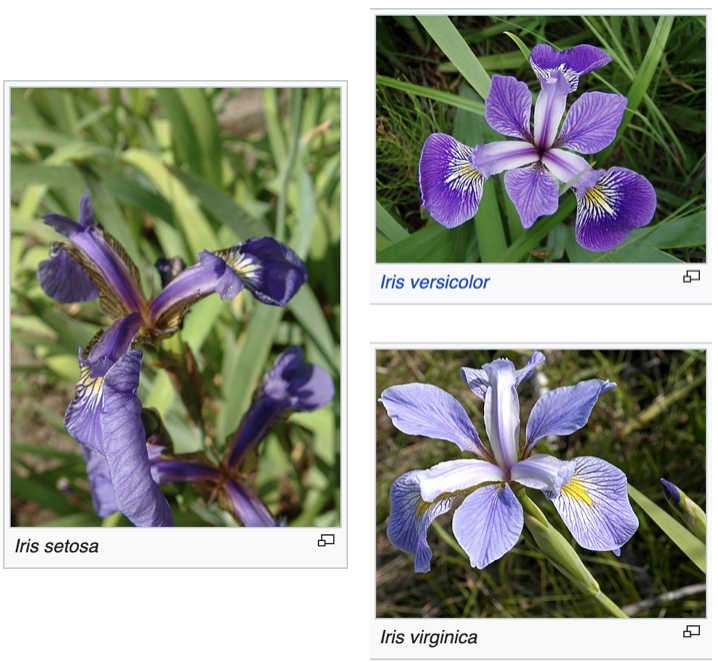

- The images of irises are taken from  https://fr.wikipedia.org/wiki/Iris_de_Fisher 

For more information about this dataset, see

- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

- https://en.wikipedia.org/wiki/Iris_flower_data_set

### 1.1 Data preparation  <a class="anchor" id="section_1_1"></a>


First step : importing this dataset.  


In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

**Exercise 2** : What are the  dimensions of `X` and of `y` ? What is the sample size ?  

In [4]:
# Answer for Exercise 2
print(np.shape(X))
print(np.shape(y))

(150, 4)
(150,)


Now we will split `X` and `Y` into two parts: training set and test set using `train_test_split`.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Exercise 3** : What are the parameters  `test_size=0.33` and  `random_state=42` used for ? What are the dimensions of  `X_train`,`X_test`, `y_train` and `y_test`?

- Indication : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [6]:
#Answer for Exercise 3 
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(100, 4)
(50, 4)
(100,)
(50,)


### 1.2 Creating a K-NN classifier <a class="anchor" id="section_1_2"></a>

Let's implement our own K-NN classifier from scratch before diving into the `KNeighborsClassifier` from `sklearn`.

**Exercise 4** : Write a  function that computes the  euclidian distance between `sample1` and `sample2`$\in \mathbb{R}^d$. 

In [7]:
def euc_dis(sample1, sample2):
    return np.linalg.norm(sample1 - sample2, axis=1) ** 2

**Exercise 5** : Write a  classification function that predicts the class of a new input `X_new` based on the training data and the value of `K`. The function should implement the K-Nearest Neighbors algorithm to make predictions. 

Hint : 

- Step 1 : Calculate the  distance between `X_new` and each data point in `X_train` using the function `euc_dis` defined in Exercise 4. 

- Step 2 : Find the K nearest neighbors using
  `np.argsort`.
    - Ref : https://numpy.org/doc/stable/reference/generated/numpy.argsort.html . 
    
- Step 3 : Return the most frequent label among those K neighbors. To do this, you can use  `collections - Counter - most_common()` 
    - Ref : https://docs.python.org/fr/3/library/collections.html . 
    - Check out the following cell for a practical demonstration of  Counter.most_common().  
    

In [8]:
#  np.argsort 

distance_ex = np.array([4, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 0.5, 0.2])
print("The indices where the 4 smallest digits are located are \n", np.argsort(distance_ex)[:4])
print("The 4 smallest digits are ", distance_ex[np.argsort(distance_ex)[:4]])

print("\n")

# counter.most_common()

from collections import Counter

print("In 'aabbbbccccccc', the frequencies of the letters are : \n", Counter('aabbbbccccccc').most_common())
print("In 'aabbbbccccccc', The letter that repeats the most is ", Counter('aabbbbccccccc').most_common()[0][0])

The indices where the 4 smallest digits are located are 
 [12 11  9 10]
The 4 smallest digits are  [0.2 0.5 1.  1. ]


In 'aabbbbccccccc', the frequencies of the letters are : 
 [('c', 7), ('b', 4), ('a', 2)]
In 'aabbbbccccccc', The letter that repeats the most is  c


In [9]:
from collections import Counter


def knn_classifier(X_train, y_train, x_new, K):
    distances = euc_dis(X_train, x_new)
    nearest_neighbors = np.argsort(distances)[:K]
    return Counter(y_train[nearest_neighbors]).most_common(1)[0][0]

**OPTIONAL Exercise (faster computation)** (**only for those of you who are comfortable with Python, or if you have already answered all the questions** in this notebook). 

In this exercise, we try to improve a little the previous code. We will use NumPy's parallel computing capabilities to make distance calculations faster and optimize the computation time of our classifier.

**Optional question 1** In order to use parallel computing, you will first create a function, named `euc_dis_mat`, that will compute the euclidian distance between the rows of two matrices.  
Let us first remind you of a few facts (if needed) :

`a.sum()`  computes the sum of all the elements in the array `a `(whatever the dimension of a is...). If you want to compute the sum for each row or each column of a 2-dimensional array, you have to specify axis=1 or axis=0 :

In [10]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [11]:
a.sum()

np.int64(10)

In [12]:
a.sum(axis=1)

array([3, 7])

In [13]:
a.sum(axis=0)

array([4, 6])

**Even more optional** 
Obviously, this works for a 3(or more)-dimensional array. For instance :

In [14]:
b = np.arange(8).reshape(2, 2, 2)
b

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [15]:
b.sum(axis=0), b.sum(axis=1), b.sum(axis=2), b.sum()

(array([[ 4,  6],
        [ 8, 10]]),
 array([[ 2,  4],
        [10, 12]]),
 array([[ 1,  5],
        [ 9, 13]]),
 np.int64(28))

Comment : for a 3-dimensional array :
- axis=0 means we sum the matrices. 
- axis=1 means we sum the rows of each matrix
- axis=2 means we sum the columns of each matrix. 

**End of even more optional**

In [16]:
def euc_dis_mat(sample1, sample2):
    return np.linalg.norm(sample1 - sample2, axis=1) ** 2

**Optional question 2**
Create a new and optimized classifier : it will be the same as before except it must use the function `euc_dist_mat`and compute the distances between the new value `x_new` and  the training values *simultaneously*.
<details>
<summary>
    Click here for a first hint </summary> 
    Create a 2-dimensional array `X_new` that contains n rows all equal to `x_new`, where n=number of rows of `X_train`. (So `X_new`is just a 2-dimensional array (same shape as `X_train`)   and the rows of `X_new` are all the same.)  
    </details>

<details>   
<summary>
    Click here for a second hint </summary> 
    You can use `np.tile` 
        </details>

In [17]:
def knn_class_2(X_train, y_train, x_new, K):
    X_new = np.tile(x_new, (len(X_train), 1))
    distances = euc_dis_mat(X_train, X_new)
    k_neighbors = np.argsort(distances)[:K]
    return Counter(y_train[k_neighbors]).most_common()[0][0]

**END OF OPTIONAL** 

**Exercise 6** : Here we predict the labels for `X_test` using the  `knn_classifier` defined in Exercise 5 for K=3. Display the accuracy rate. 

In [18]:
predictions = [knn_classifier(X_train, y_train, data, 3) for data in X_test]
predictions2 = [knn_class_2(X_train, y_train, data, 3) for data in X_test]

print(f"The accuracy rate of our classifier is {np.sum(predictions == y_test) / len(predictions) * 100}%")
print(f"The accuracy rate of our classifier is {np.sum(predictions2 == y_test) / len(predictions2) * 100}%")

The accuracy rate of our classifier is 98.0%
The accuracy rate of our classifier is 98.0%


### 1.3  The K-NN classifier of `sklearn`  <a class="anchor" id="section_1_3"></a>


Now we will directly use `KNeighborsClassifier` available in the `sklearn` package. 

- Ref : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

We will use the value $K=3$. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_2 = KNeighborsClassifier(n_neighbors=3)

**Exercise 7** : Train the  `knn_classifier_2` model using `X_train` and `y_train`.

In [20]:
knn_classifier_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Exercise 8** : Display the accuracy rate of `knn_classifier_2` on the test set. 

In [21]:
knn_classifier_2.score(X_test, y_test)

0.98

## 2. ($\star$) The decision boundary of the  K-NN classifier<a class="anchor" id="chapter2"></a>

In this section, we'll examine the decision boundary for the K-NN model in the context of binary classification. 

**Exercise 9** : What is the decision boundary ? 

Hint : https://en.wikipedia.org/wiki/Decision_boundary 

Answer for Exercise 9 :
 
 
 
 
 


Now let us examine  the decision boundary for a K-NN classifier on a simulated dataset.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.neighbors import KNeighborsClassifier

In [23]:
rng = np.random.default_rng(seed=12)
num_observations = 100

xx1 = rng.multivariate_normal([0, 0], [[1, 0.6], [0.6, 1]], num_observations)
xx2 = rng.multivariate_normal([1, 2], [[1, 0.6], [0.6, 1]], num_observations)

X2 = np.vstack((xx1, xx2)).astype(np.float32)
Y2 = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

print(X2.shape, Y2.shape)

(200, 2) (200,)


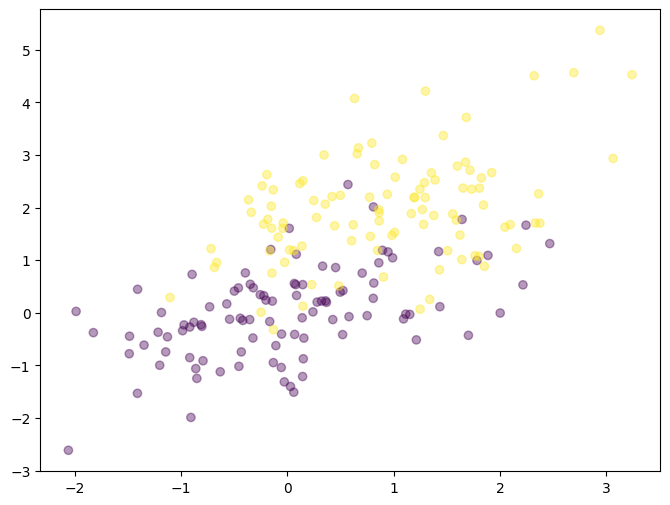

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, alpha=0.4)

**Exercise 10** : Define 6  K-NN classifiers with  K=1,3,5,7,9,11 and fit these 6 classifiers on  `(XX,yy)`. The 6 models will be contained in a list named  `KNNs`.  

In [25]:
nb_neighbors = [1, 3, 5, 7, 9, 11]

KNNs = []

for k in nb_neighbors:
    knn_classifier_k = KNeighborsClassifier(n_neighbors=k)
    knn_classifier_k.fit(X2, Y2)
    KNNs.append(knn_classifier_k)

Let us now visualize the  decision boundary of our 6   K-NN classifiers. 

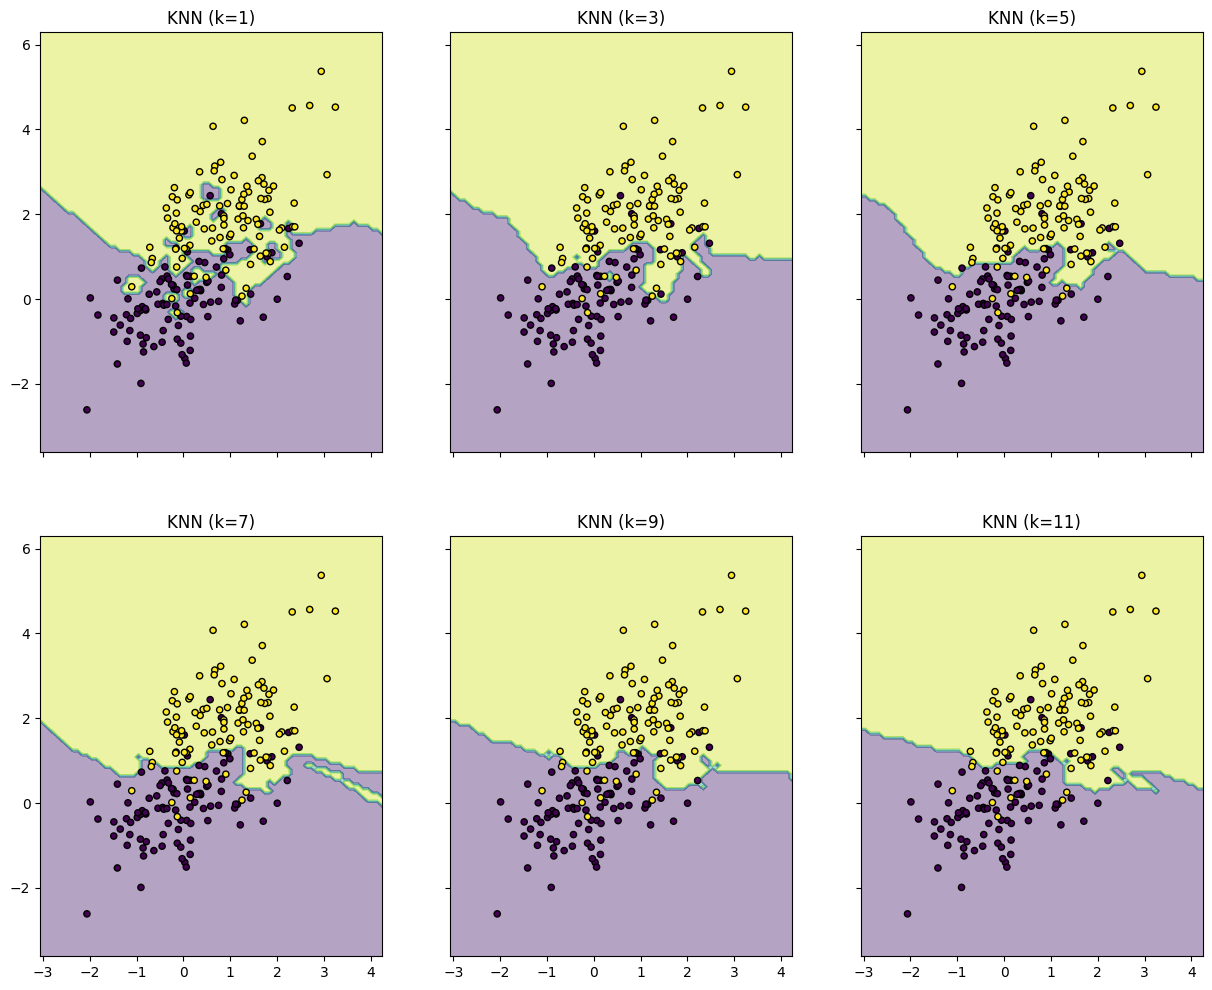

In [26]:
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(2, 3, sharex="col", sharey="row", figsize=(15, 12))

for idx, clf, tt in zip(product([0, 1, 2], [0, 1, 2]), KNNs, [f"KNN (k={k})" for k in nb_neighbors]):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X2[:, 0], X2[:, 1], c=Y2, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


**Exercise 11** : what comments do these six boundary decisions bring up?




Answer for Exercise 11: the larger K is, ....







## 2. ($\star$) MNIST dataset<a class="anchor" id="chapter2"></a>

The MNIST dataset is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. Let us import the dataset  using sklearn : 

In [27]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

The data is contained in the attributes `data` and `target`: 

In [28]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [30]:
X, y = mnist.data, mnist.target

In [31]:
type(X)

pandas.core.frame.DataFrame

In [32]:
type(y)

pandas.core.series.Series

So X is a dataframe  and y is a series. We will encounter those objects again later but for the moment, let us manipulate numpy arrays instead : 

In [33]:
X, y = X.to_numpy(), y.to_numpy()
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [34]:
X.shape, y.shape

((70000, 784), (70000,))

If you want to display the corresponding images, you must reshape the data into 28x28 arrays (instead of one-dimensional arrays with 784 elements). Let us display the first digit :

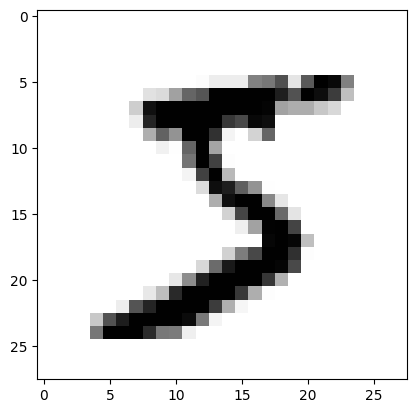

In [35]:
import matplotlib.pyplot as plt

first_figure = X[0].reshape(28, 28)
plt.imshow(first_figure, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [36]:
# we recognised a "5" 
y[0]

'5'

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Exercise 12**
Display the accuracy rate on the test set : again we will use the K-NN classifier with K=3.

Warning : do not use your own classifier as it will probably fail. Use sklearn's classifier.

In [38]:
knn_classifier_3 = KNeighborsClassifier(n_neighbors=3)
knn_classifier_3.fit(X_train, y_train)
print(f"Accuracy score: {knn_classifier_3.score(X_test, y_test)}")
predictions = knn_classifier_3.predict(X)
predictions[0]

Accuracy score: 0.9693506493506493


'5'

## 2. ($\star$) CIFAR10 dataset<a class="anchor" id="chapter2"></a>

The CIFAR-10 and CIFAR-100 datasets are labeled subsets of the 80 million tiny images dataset. CIFAR-10 and CIFAR-100 were created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information here  : https://www.cs.toronto.edu/~kriz/cifar.html

In [39]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [40]:
type(X_train)

numpy.ndarray

In [41]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

Let us reshape `y_train` into a one-dimensional array (instead of a 2 dimensional array with one column) using `ravel` (see the very example here if needed : https://numpy.org/doc/2.1/reference/generated/numpy.ravel.html)

Let us reshape `y_train` into a one-dimensional array instead of a 2 dimensional array using `ravel` (see the very example here if needed : https://numpy.org/doc/2.1/reference/generated/numpy.ravel.html)

In [42]:
y = y_train.ravel()
y.shape



(50000,)

In [43]:
y[0:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

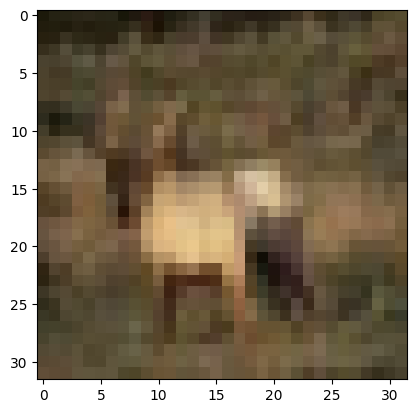

In [44]:
plt.figure()
plt.imshow(X_train[3], interpolation='nearest')
plt.show()  # the image is very blurred, do not worry...

In [45]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(class_names[y[3]])

deer


Each image is a 32x32x3 array that we turn into a $32*32*3$=3072 one-dimensional array using `reshape`, in order to be able to feed it to a KNN classifier.  

In [46]:
X = X_train.reshape(X_train.shape[0], -1)
X.shape

(50000, 3072)

**Exercise 13** Same as Exercise 12. 

Warning : again, use Sklearn's classifier.  

Can you explain the poor performance of the K-NN classifier on this dataset ? 

In [47]:
X1, y1 = X_test.reshape(X_test.shape[0], -1), y_test.ravel()
print(X1.shape, y1.shape)

knn_classifier_4 = KNeighborsClassifier(n_neighbors=3)
knn_classifier_4.fit(X, y)
knn_classifier_4.score(X1, y1)

(10000, 3072) (10000,)


0.3303